LIBRARY YANG PERLU DISEDIAKAN

In [1]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set style untuk visualisasi
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

Data Dimuat

In [2]:
# Load dataset
df = pd.read_csv("ds_salaries.csv")
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


DATA WRANGLING

Eksplorasi Data Awal

In [3]:
# Info dasar tentang dataset
print("Shape:", df.shape)
print("\nInfo:")
df.info()
print("\nStatistik deskriptif:")
df.describe(include='all')

Shape: (3755, 11)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB

Statistik deskriptif:


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,3755.000000,3755,3755,3755,3.755000e+03,3755,3755.000000,3755,3755.000000,3755,3755
unique,NaN,4,4,93,NaN,20,NaN,78,NaN,72,3
top,NaN,SE,FT,Data Engineer,NaN,USD,NaN,US,NaN,US,M
freq,NaN,2516,3718,1040,NaN,3224,NaN,3004,NaN,3040,3153
mean,2022.373635,NaN,NaN,NaN,1.906956e+05,NaN,137570.389880,NaN,46.271638,NaN,NaN
std,0.691448,NaN,NaN,NaN,6.716765e+05,NaN,63055.625278,NaN,48.589050,NaN,NaN
min,2020.000000,NaN,NaN,NaN,6.000000e+03,NaN,5132.000000,NaN,0.000000,NaN,NaN
25%,2022.000000,NaN,NaN,NaN,1.000000e+05,NaN,95000.000000,NaN,0.000000,NaN,NaN
50%,2022.000000,NaN,NaN,NaN,1.380000e+05,NaN,135000.000000,NaN,0.000000,NaN,NaN
75%,2023.000000,NaN,NaN,NaN,1.800000e+05,NaN,175000.000000,NaN,100.000000,NaN,NaN


Data Cleaning

In [4]:
# Cek missing values
print("Missing values per kolom:")
print(df.isnull().sum())

Missing values per kolom:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [5]:
# Cek duplikat
print("Jumlah duplikat:", df.duplicated().sum())

# Hapus duplikat jika ada
df = df.drop_duplicates()

# Mengecek kembali apakah duplikasi masih ada atau belumt
print("Jumlah duplikat:", df.duplicated().sum())

Jumlah duplikat: 1171
Jumlah duplikat: 0


In [6]:
# Cek nilai unik untuk kolom kategorikal
cat_cols = ['experience_level', 'employment_type', 'job_title', 'salary_currency', 
            'employee_residence', 'company_location', 'company_size']

for col in cat_cols:
    print(f"\nNilai unik untuk {col}:")
    print(df[col].value_counts())


Nilai unik untuk experience_level:
experience_level
SE    1554
MI     664
EN     270
EX      96
Name: count, dtype: int64

Nilai unik untuk employment_type:
employment_type
FT    2547
PT      17
CT      10
FL      10
Name: count, dtype: int64

Nilai unik untuk job_title:
job_title
Data Engineer                598
Data Scientist               538
Data Analyst                 396
Machine Learning Engineer    206
Analytics Engineer            91
                            ... 
Principal Data Architect       1
Head of Machine Learning       1
Cloud Data Architect           1
Staff Data Scientist           1
Finance Data Analyst           1
Name: count, Length: 93, dtype: int64

Nilai unik untuk salary_currency:
salary_currency
USD    2107
EUR     200
GBP     144
INR      59
CAD      25
AUD       9
BRL       6
SGD       6
PLN       5
CHF       4
TRY       3
HUF       3
DKK       3
JPY       3
THB       2
HKD       1
ILS       1
CZK       1
MXN       1
CLP       1
Name: count, dtype: int64

EXPLORATORY DATA ANALYSIS (EDA)

In [7]:
# Membuat mapping untuk experience level
exp_level_map = {
    'EN': 'Entry-level',
    'MI': 'Mid-level',
    'SE': 'Senior-level',
    'EX': 'Executive-level'
}

df['experience_level'] = df['experience_level'].map(exp_level_map)

In [8]:
emp_type_map = {
    'FT': 'Full-time',
    'PT': 'Part-time',
    'CT': 'Contract',
    'FL': 'Freelance'
}

df['employment_type'] = df['employment_type'].map(emp_type_map)

In [9]:
company_size_map = {
    'S': 'Small',
    'M': 'Medium',
    'L': 'Large'
}

df['company_size'] = df['company_size'].map(company_size_map)

In [10]:
df['remote_work_type'] = pd.cut(df['remote_ratio'],
                               bins=[-1, 0, 50, 100],
                               labels=['On-site', 'Hybrid', 'Full-remote'])

In [11]:
# Membuat fungsi untuk menentukan region
def get_region(country_code):
    americas = ['US', 'CA', 'MX', 'BR', 'CO']
    europe = ['GB', 'DE', 'ES', 'FR', 'NL', 'PT', 'CH', 'IE', 'AT', 'SI', 'HR']
    asia = ['IN', 'SG', 'JP', 'HK', 'IL', 'AE', 'PK', 'TH']
    oceania = ['AU', 'NZ']
    africa = ['NG', 'KE', 'GH']
    
    if country_code in americas:
        return 'Americas'
    elif country_code in europe:
        return 'Europe'
    elif country_code in asia:
        return 'Asia'
    elif country_code in oceania:
        return 'Oceania'
    elif country_code in africa:
        return 'Africa'
    else:
        return 'Other'

df['region'] = df['company_location'].apply(get_region)

In [12]:
# Fungsi untuk mengkategorikan job title
def categorize_job(title):
    title = title.lower()
    if 'data scientist' in title:
        return 'Data Scientist'
    elif 'data engineer' in title:
        return 'Data Engineer'
    elif 'data analyst' in title:
        return 'Data Analyst'
    elif 'machine learning' in title or 'ml' in title:
        return 'Machine Learning Engineer'
    elif 'research' in title or 'scientist' in title:
        return 'Research Scientist'
    elif 'analytics' in title:
        return 'Analytics Engineer'
    elif 'architect' in title:
        return 'Data Architect'
    elif 'manager' in title or 'lead' in title or 'director' in title or 'head' in title:
        return 'Management'
    else:
        return 'Other'

df['job_category'] = df['job_title'].apply(categorize_job)

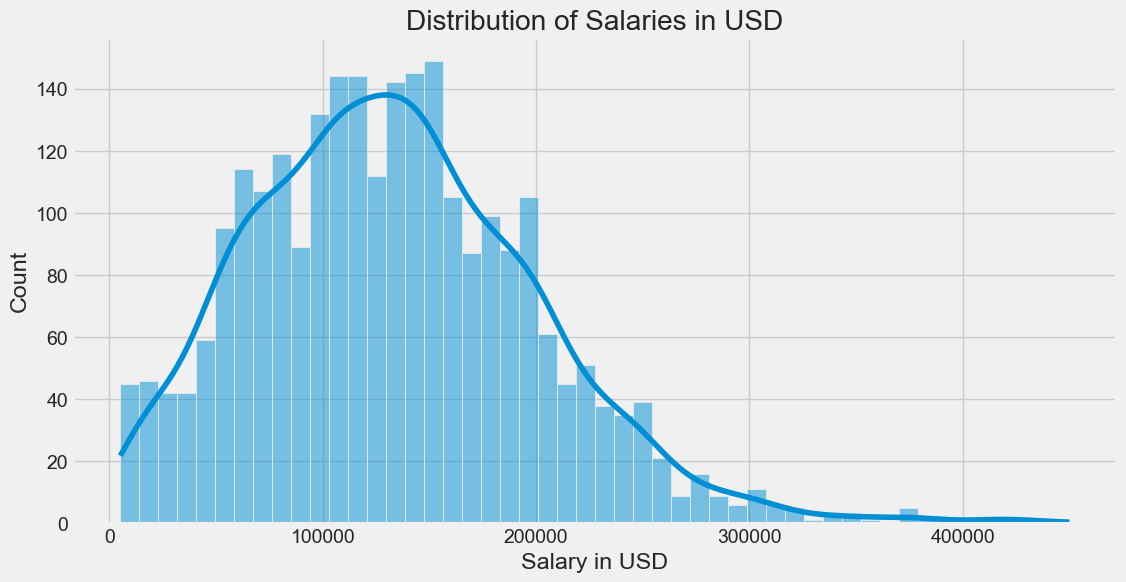

In [13]:
#  Distribusi gaji dalam USD
plt.figure(figsize=(12, 6))
sns.histplot(df['salary_in_usd'], bins=50, kde=True)
plt.title('Distribution of Salaries in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Count')
plt.show()

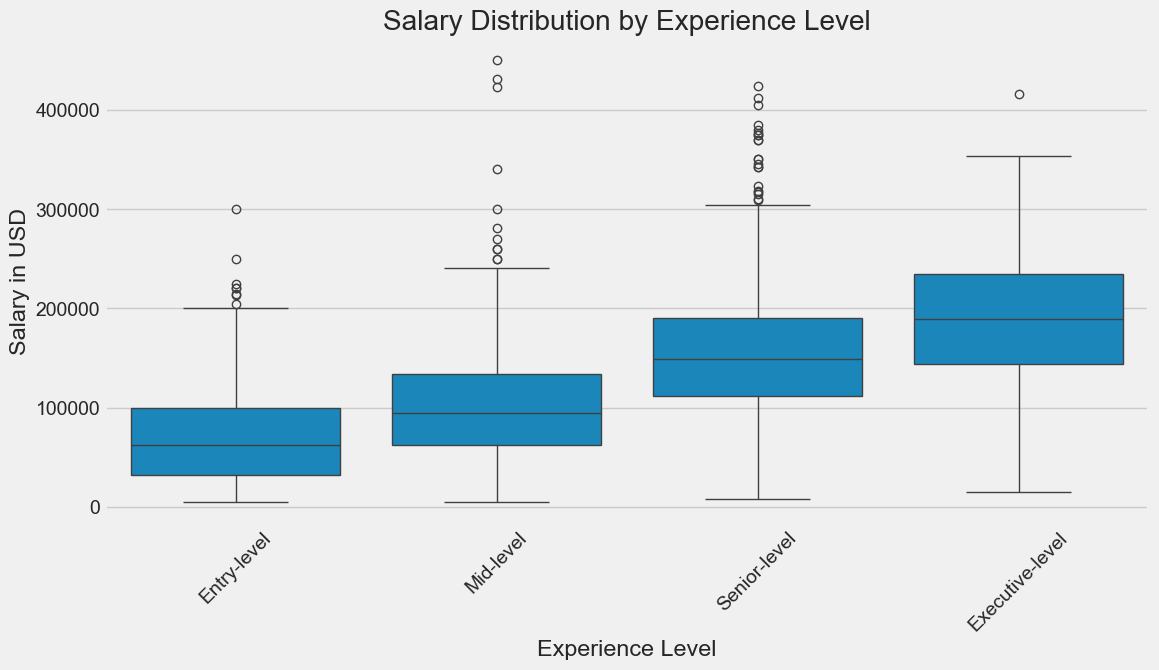

In [14]:
#  Gaji berdasarkan level pengalaman
plt.figure(figsize=(12, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df, order=['Entry-level', 'Mid-level', 'Senior-level', 'Executive-level'])
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.xticks(rotation=45)
plt.show()

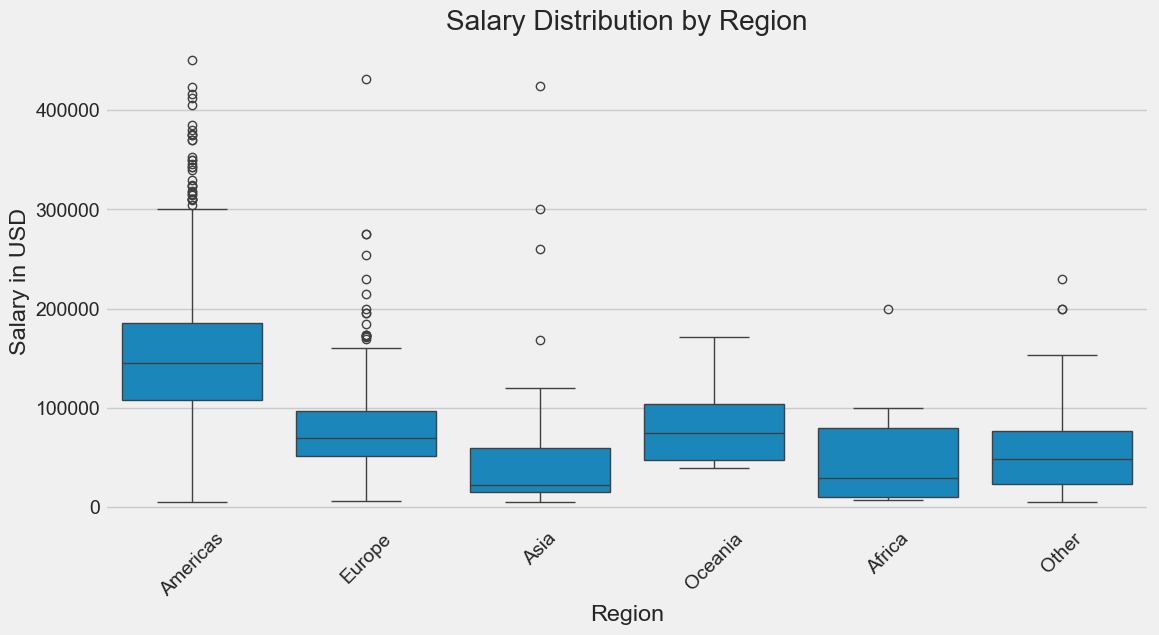

In [15]:
#Gaji berdasarkan region
plt.figure(figsize=(12, 6))
sns.boxplot(x='region', y='salary_in_usd', data=df, 
            order=['Americas', 'Europe', 'Asia', 'Oceania', 'Africa', 'Other'])
plt.title('Salary Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Salary in USD')
plt.xticks(rotation=45)
plt.show()

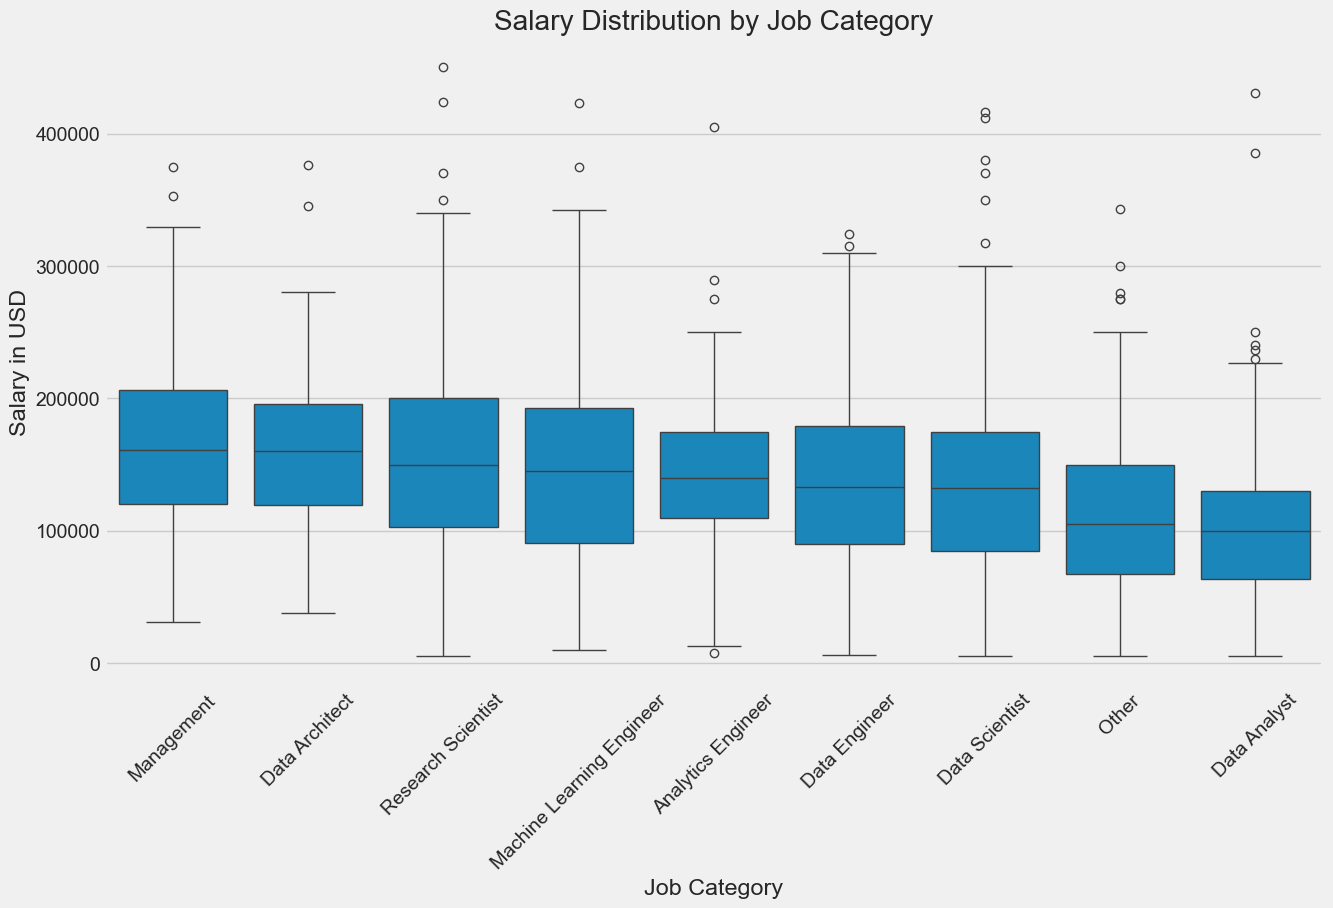

In [16]:
#  Gaji berdasarkan kategori pekerjaan
plt.figure(figsize=(14, 8))
order = df.groupby('job_category')['salary_in_usd'].median().sort_values(ascending=False).index
sns.boxplot(x='job_category', y='salary_in_usd', data=df, order=order)
plt.title('Salary Distribution by Job Category')
plt.xlabel('Job Category')
plt.ylabel('Salary in USD')
plt.xticks(rotation=45)
plt.show()

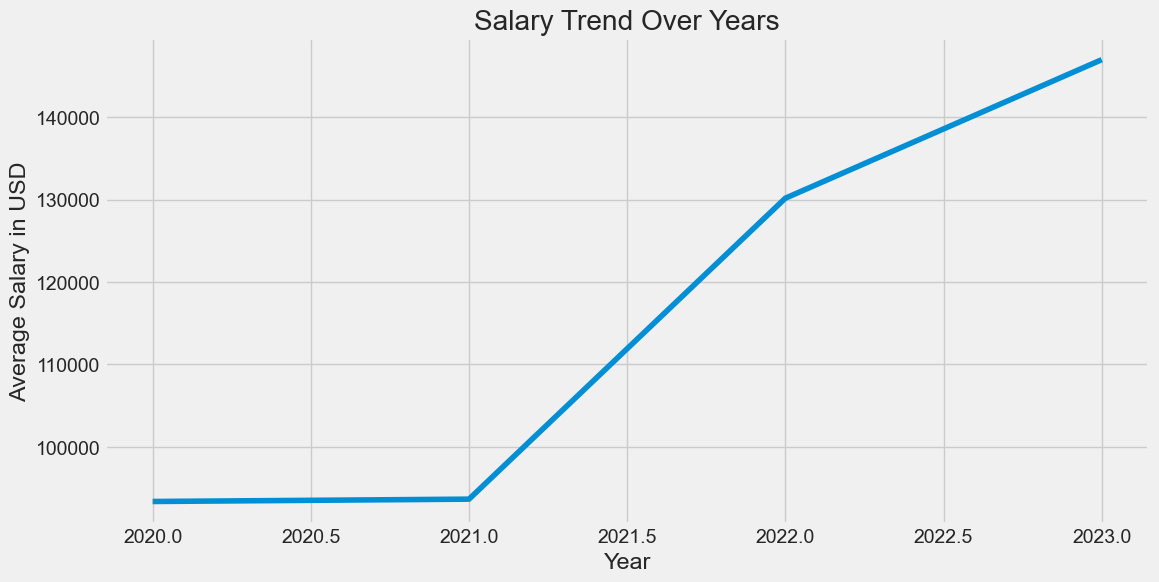

In [17]:
#  Tren gaji dari tahun ke tahun
plt.figure(figsize=(12, 6))
sns.lineplot(x='work_year', y='salary_in_usd', data=df, ci=None)
plt.title('Salary Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Average Salary in USD')
plt.show()

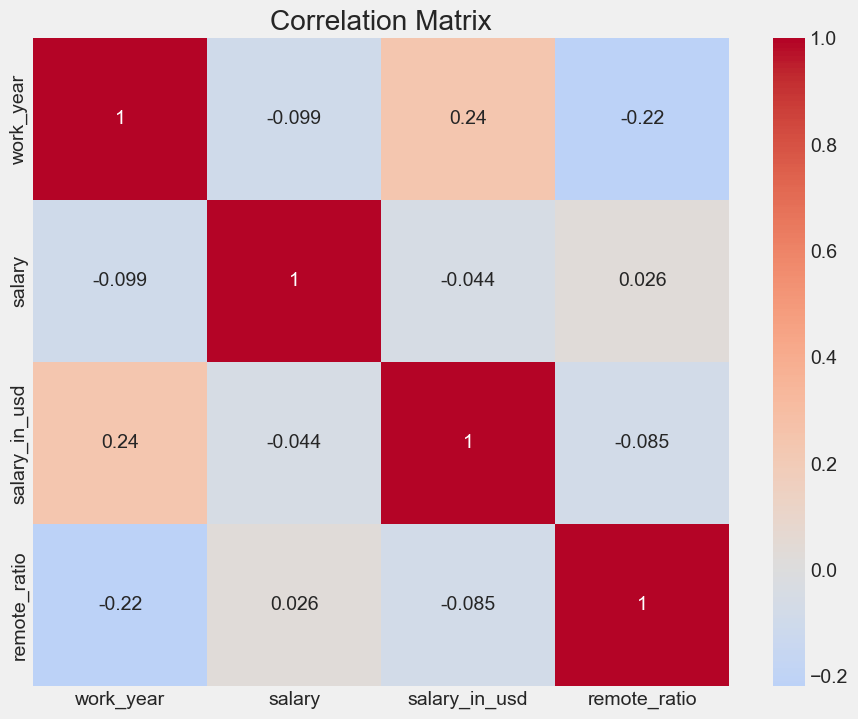

In [18]:
#  Korelasi antara variabel numerik
# Pilih hanya kolom numerik
num_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

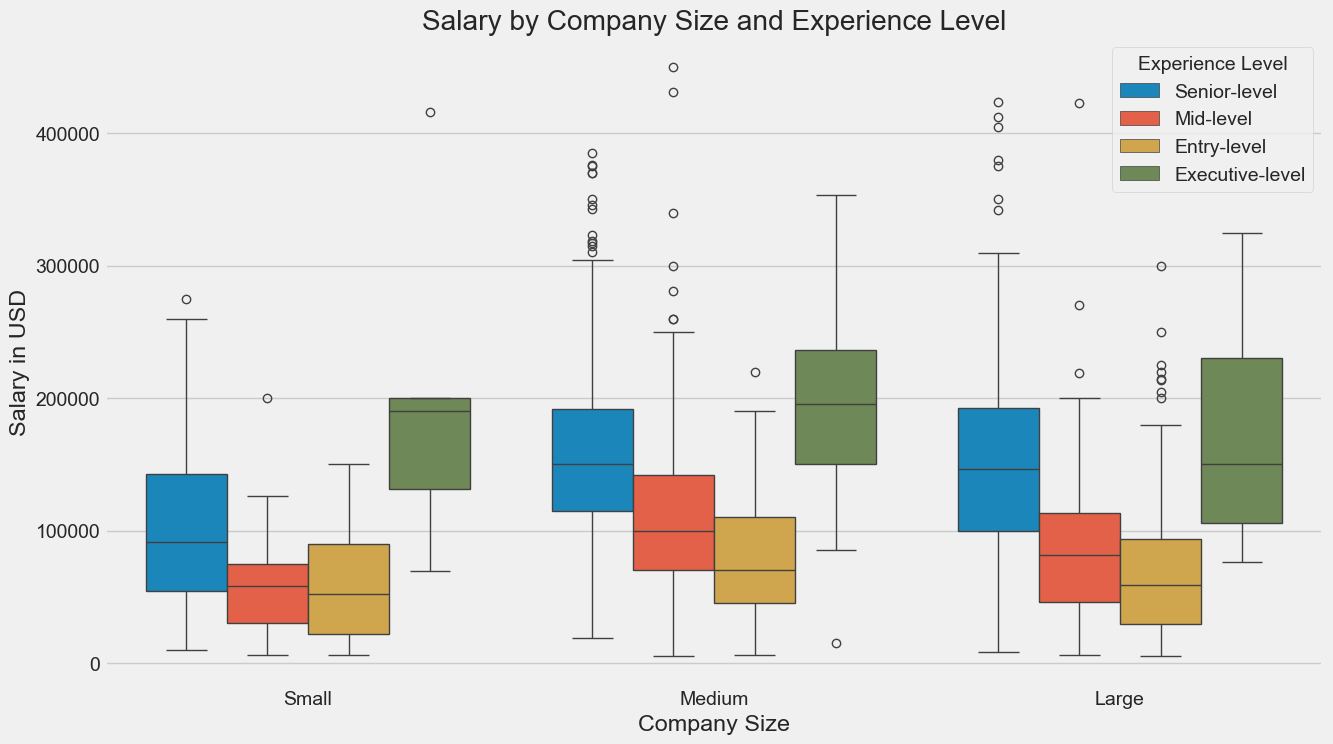

In [19]:
#  Gaji berdasarkan ukuran perusahaan dan level pengalaman
plt.figure(figsize=(14, 8))
sns.boxplot(x='company_size', y='salary_in_usd', hue='experience_level', data=df,
           order=['Small', 'Medium', 'Large'])
plt.title('Salary by Company Size and Experience Level')
plt.xlabel('Company Size')
plt.ylabel('Salary in USD')
plt.legend(title='Experience Level')
plt.show()

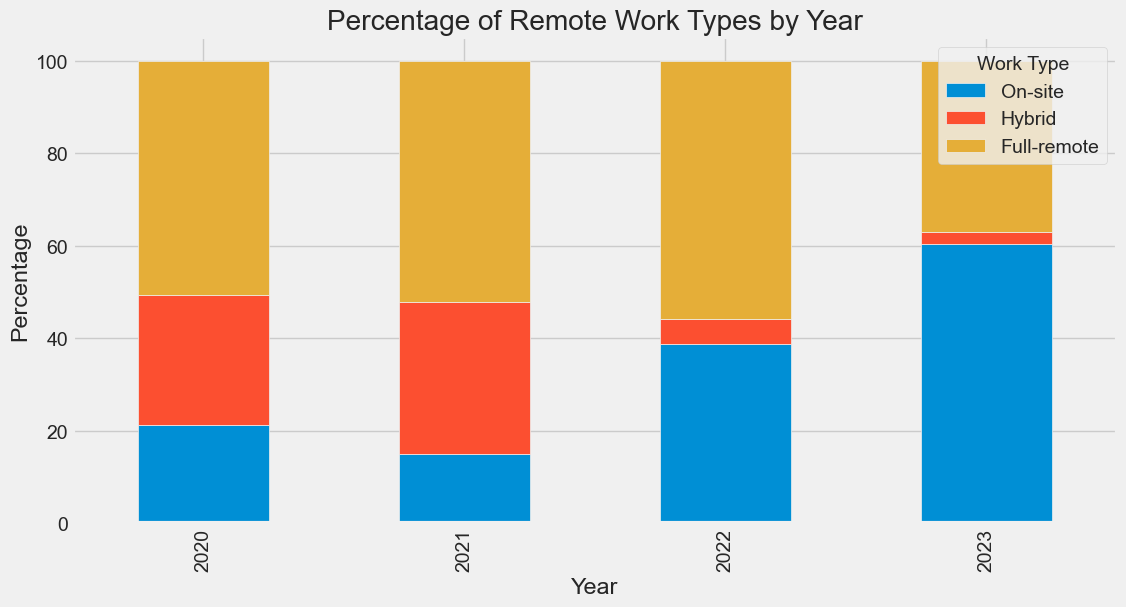

In [20]:
# Persentase remote work per tahun
remote_by_year = df.groupby(['work_year', 'remote_work_type']).size().unstack().apply(lambda x: x/x.sum()*100, axis=1)

remote_by_year.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Percentage of Remote Work Types by Year')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Work Type')
plt.show()

In [21]:
#  DataFrame untuk analisis gaji per region dan job category
salary_by_region_job = df.groupby(['region', 'job_category'])['salary_in_usd'].agg(['mean', 'median', 'count']).reset_index()
salary_by_region_job = salary_by_region_job.rename(columns={
    'mean': 'avg_salary',
    'median': 'median_salary',
    'count': 'job_count'
})

# Filter hanya kategori dengan cukup data (minimal 5 observasi)
salary_by_region_job = salary_by_region_job[salary_by_region_job['job_count'] >= 5]

salary_by_region_job.sort_values(by='median_salary', ascending=False).head(10)

,region,job_category,avg_salary,median_salary,job_count
10,Americas,Management,181659.500000,175000.0,96
6,Americas,Data Architect,169621.812500,167800.0,64
9,Americas,Machine Learning Engineer,171145.153527,165000.0,241
12,Americas,Research Scientist,173776.686957,160000.0,115
8,Americas,Data Scientist,154024.191686,150000.0,433
7,Americas,Data Engineer,153411.143137,150000.0,510
4,Americas,Analytics Engineer,152145.471698,143530.0,106
11,Americas,Other,133059.895652,128000.0,115
5,Americas,Data Analyst,112802.437673,109000.0,361
42,Other,Management,121237.400000,106000.0,5


In [22]:
#  DataFrame untuk analisis gaji berdasarkan pengalaman dan ukuran perusahaan
salary_exp_company = df.groupby(['experience_level', 'company_size'])['salary_in_usd'].agg(['mean', 'median', 'count']).reset_index()
salary_exp_company = salary_exp_company.rename(columns={
    'mean': 'avg_salary',
    'median': 'median_salary',
    'count': 'job_count'
})

salary_exp_company.sort_values(by='median_salary', ascending=False)

,experience_level,company_size,avg_salary,median_salary,job_count
4,Executive-level,Medium,194971.740260,195800.0,77
5,Executive-level,Small,196827.166667,190000.0,6
3,Executive-level,Large,165363.153846,150000.0,13
10,Senior-level,Medium,155581.680566,150000.0,1343
9,Senior-level,Large,152468.886905,146350.0,168
7,Mid-level,Medium,109968.598344,100000.0,483
11,Senior-level,Small,106875.465116,91237.0,43
6,Mid-level,Large,88283.742424,81264.0,132
1,Entry-level,Medium,78691.688000,70000.0,125
0,Entry-level,Large,71685.083333,58551.0,96


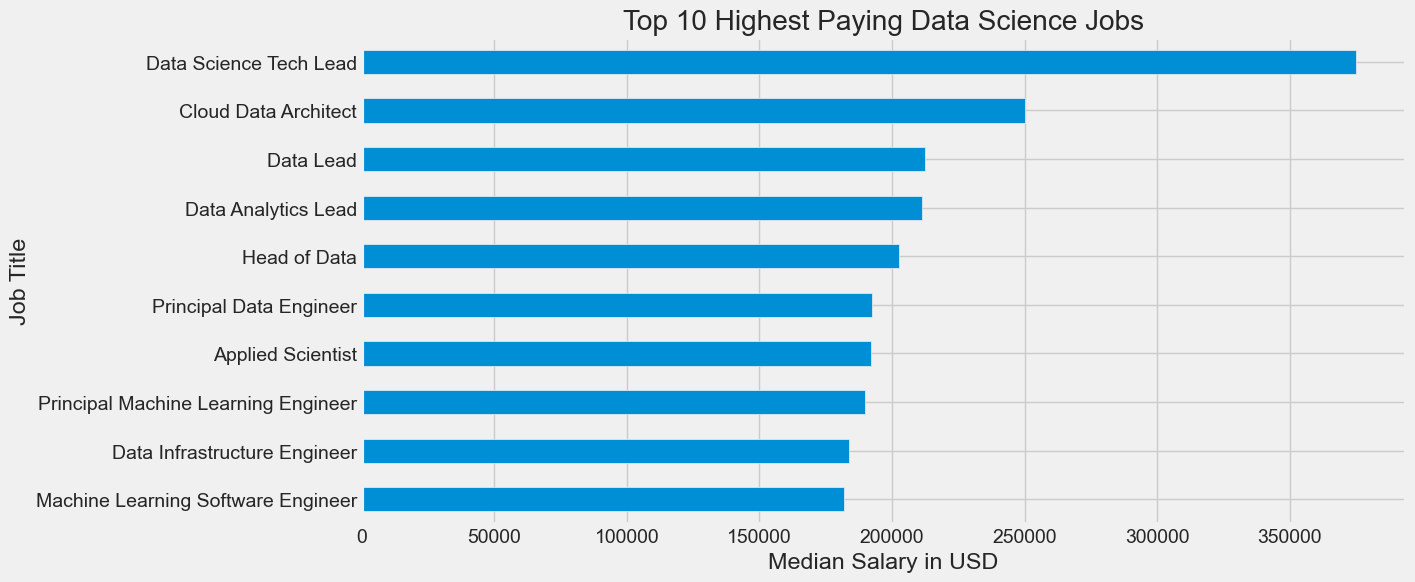

In [24]:
# Top 10 pekerjaan dengan gaji tertinggi
top_jobs = df.groupby('job_title')['salary_in_usd'].median().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_jobs.plot(kind='barh')
plt.title('Top 10 Highest Paying Data Science Jobs')
plt.xlabel('Median Salary in USD')
plt.ylabel('Job Title')
plt.gca().invert_yaxis()
plt.show()

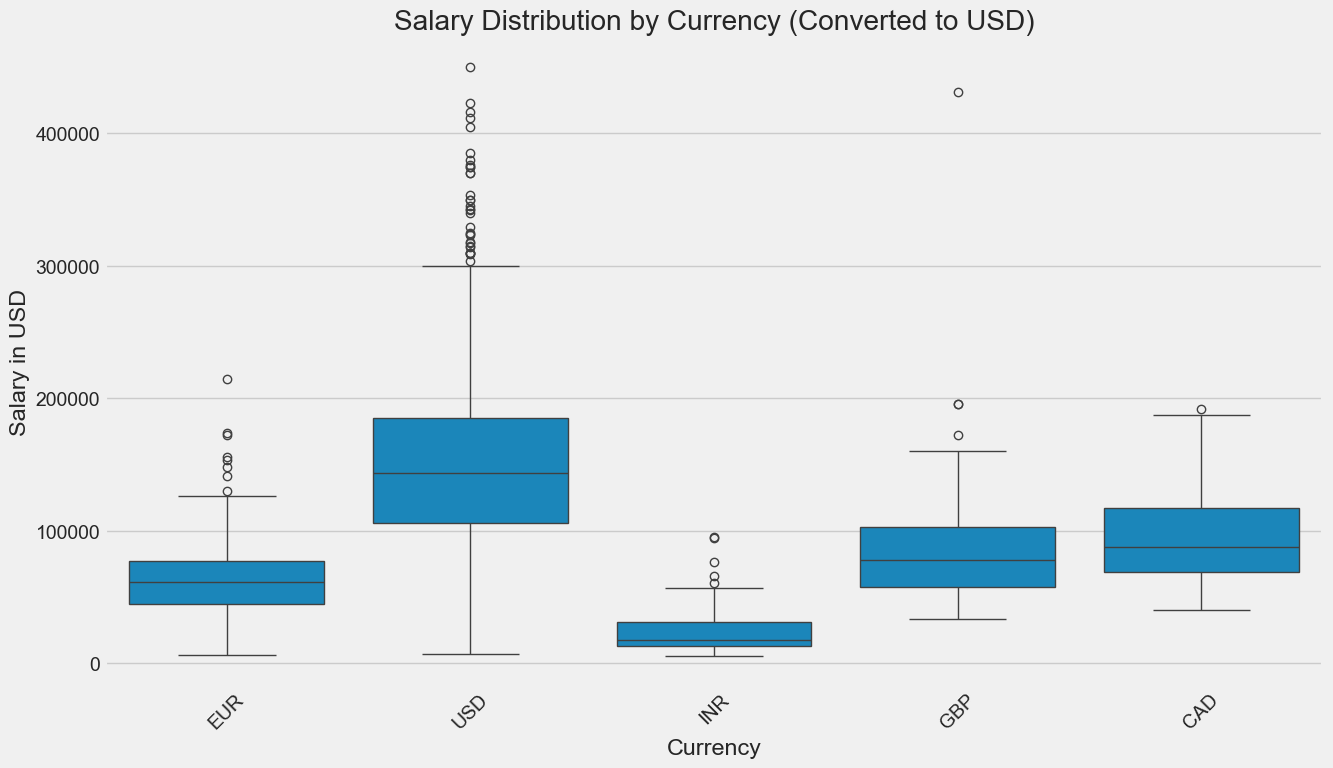

In [23]:
# Pilih hanya mata uang dengan cukup data
currency_counts = df['salary_currency'].value_counts()
major_currencies = currency_counts[currency_counts > 10].index

plt.figure(figsize=(14, 8))
sns.boxplot(x='salary_currency', y='salary_in_usd', 
            data=df[df['salary_currency'].isin(major_currencies)])
plt.title('Salary Distribution by Currency (Converted to USD)')
plt.xlabel('Currency')
plt.ylabel('Salary in USD')
plt.xticks(rotation=45)
plt.show()

In [25]:
# Simpan data yang sudah diolah ke file CSV baru
df.to_csv('processed_ds_salaries.csv', index=False)